In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, NullLocator, MaxNLocator
from matplotlib.colors import Normalize
%matplotlib inline

In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:86.0) Gecko/20100101 Firefox/86.0'}
page_all_results = requests.get('https://www.parkrun.ru/results/courserecords/', headers=headers)

In [10]:
data = pd.read_html(page_all_results.text)[0]
data.drop(data.columns[[1, 5]], axis=1, inplace=True)
data.columns = ['parkrun', 'w_name', 'w_time', 'w_date', 'm_name', 'm_time', 'm_date']

# Рекорды трассы

In [11]:
data

,parkrun,w_name,w_time,w_date,m_name,m_time,m_date
0,Angarskie Prudy,Марина ЖАЛЫБИНА,20:24,27/07/2019,Фёдор БАКУЛОВ,16:53,28/09/2019
1,Babushkinsky na Yauze,Женя Л,19:58,03/04/2021,Александр ХАНКОВ,16:41,10/04/2021
2,Balashikha Zarechnaya,Наталья СТУДЕНИКИНА,17:53,03/04/2021,Роман САЗОНОВ,15:40,08/09/2018
3,Belgorod Park Pobedy,Ксения АВДЕЕВА,19:56,10/08/2019,Михаил ЗВЯГИНЦЕВ,16:26,07/03/2020
4,Bitsa,Анна БАЛАКШИНА,18:52,12/08/2017,Виктор НИКОЛАЕВ,16:04,27/10/2018
5,Boeva Dacha,Анна КАРАСЮК,19:36,19/12/2020,Иван БУБНОВ,15:58,10/04/2021
6,Butovo,Дарья ЧУДАЙКИНА,18:39,22/08/2015,Виктор НИКОЛАЕВ,15:57,06/07/2019
7,Cheboksary naberezhnaya,Зинаида ОБРУЧКОВА,18:05,Новый рекорд на этой неделе,Михаил УМНОВ,16:51,17/04/2021
8,Chelyabinsk,Антонина ОГОРОДНИКОВА,18:18,23/07/2016,Алексей РЫЖОВ,16:17,24/09/2016
9,Chelyabinsk Ekopark,Анастасия СОКОЛОВА,20:48,17/04/2021,Никита СПИРИДОНОВ,16:42,01/05/2021


Записи с "нетипичными" данными

In [12]:
mask = (data['w_date'].str.len() > 10) | (data['m_date'].str.len() > 10)
data.loc[mask]

,parkrun,w_name,w_time,w_date,m_name,m_time,m_date
7,Cheboksary naberezhnaya,Зинаида ОБРУЧКОВА,18:05,Новый рекорд на этой неделе,Михаил УМНОВ,16:51,17/04/2021
15,Fili,Екатерина ШЛЯХОВА,20:45,10/04/2021,Дмитрий КОРОВИН,17:15,Новый рекорд на этой неделе
22,Kazan Central,Рамиля ШАГИЕВААлсу ШАГИЕВА,20:29,27/08/201627/08/2016,Кирилл ДЯТЛОВ,16:28,12/10/2019
28,Komsomolsky,Юлия ШАГИАХМЕТОВА,21:37,Новый рекорд на этой неделе,Василий КОРЫТКИН,16:06,24/04/2021
35,Lobnya Gorodskoy Park,Людмила ХОДАКОВА,19:50,Новый рекорд на этой неделе,Хаперских ДМИТРИЙ,17:57,01/05/2021
41,Mytishchi Central Park,Елена СКОБЛИНА,20:02,24/04/2021,Алексей ТЕРЕНТЬЕВ,17:20,Новый рекорд на этой неделе
45,Nizhny Prud,Анна РУСИНОВА,20:18,Новый рекорд на этой неделе,Алексей КОЛОКОЛЬНИКОВ,17:50,10/04/2021
47,Novosibirsk naberezhnaya,София КОРОТИЧ,19:57,24/08/2019,Николай ШЕВЕЛЬ,16:25,Новый рекорд на этой неделе
52,Park Kirova,Ольга ФЕОФИЛАКТОВА,20:37,Новый рекорд на этой неделе,Pavel KASATKIN,16:32,17/04/2021
57,Petrovskaya naberezhnaya,Анна ПРИВАЛОВА,21:38,Новый рекорд на этой неделе,Михаил КУДИНОВ,18:45,Новый рекорд на этой неделе


## Список всех российских паркранов

In [13]:
russian_parkruns = data['parkrun']

Всего активных паркранов в России:

In [14]:
len(russian_parkruns)

95

In [15]:
pd.set_option('display.max_rows', None)
russian_parkruns

0                 Angarskie Prudy
1           Babushkinsky na Yauze
2           Balashikha Zarechnaya
3            Belgorod Park Pobedy
4                           Bitsa
5                     Boeva Dacha
6                          Butovo
7         Cheboksary naberezhnaya
8                     Chelyabinsk
9             Chelyabinsk Ekopark
10      Chertanovo Pokrovsky Park
11                    Dolgoprudny
12                        Druzhba
13                  Elagin Ostrov
14                    Filatov Lug
15                           Fili
16            Gatchina Prioratsky
17                     Gorky Park
18           Gorodskoy Park Semya
19                 Gubernsky Park
20            Internatsionalistov
21                      Izmailovo
22                  Kazan Central
23                         Khimki
24                          Kimry
25           Kolchugino City Park
26                    Kolomenskoe
27                        Kolpino
28                    Komsomolsky
29            

In [16]:
russian_parkruns.to_csv('russian_parkruns.csv', index=False)

## Анализ мужских результатов

### Топ10 рекордов мужчин и самых быстрых российских паркранов

In [17]:
data.drop(data.iloc[:,1:4], axis=1).sort_values(by=['m_time']).reset_index(drop=True).head(10)

,parkrun,m_name,m_time,m_date
0,Tambov,Леон АРТЁМОВ,14:28,08/06/2019
1,Gorky Park,Вячеслав СОКОЛОВ,14:50,27/04/2019
2,Elagin Ostrov,Валентин СМИРНОВ,14:53,10/08/2019
3,Ufa Botanichesky Sad,Григорий АНДРЕЕВ,14:57,12/05/2018
4,Mega Park Kudrovo,Дмитрий ТРИПУТЕНЬ,15:01,21/07/2018
5,Sosnovka,Станислав АГЕЛЬЯРОВ,15:11,01/06/2019
6,Ryazan Central,Александр ИМЕНИН,15:14,27/08/2016
7,Vernadskogo,Вячеслав СОКОЛОВ,15:16,13/04/2019
8,Ryazan Oreshek,Александр ИМЕНИН,15:18,28/12/2019
9,Meshchersky,Вячеслав СОКОЛОВ,15:18,08/06/2019


### Топ5 мужчин с наибольшим количеством рекордов на разных паркранах

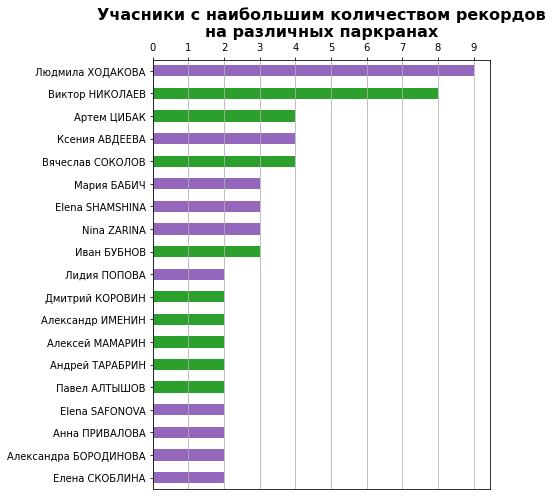

In [19]:
rec_men = data['m_name'].value_counts()
rec_women = data['w_name'].value_counts()
most_rec_men = rec_men[rec_men > 1]
most_rec_women = rec_women[rec_women > 1]
df = pd.concat([most_rec_men, most_rec_women], axis = 0).sort_values(ascending=True)
plt.figure(figsize=(7,7))
ax = df.plot(kind = 'barh', grid=True)
for ptch, tick in zip(ax.patches, ax.yaxis.get_major_ticks()):
    c = '#2ca02c' if tick.label.get_text() in most_rec_men.index else '#9467bd'
    ptch.set_facecolor(c)

ax.grid(b=False, which='major', axis='y')

ax.xaxis.set_major_locator(MaxNLocator(steps=[1, 2], integer=True))
ax.xaxis.tick_top()
plt.title('Учасники с наибольшим количеством рекордов\nна различных паркранах', size=16, fontweight='bold')
plt.tight_layout()

### 10 самых медленных паркранов (где мужские рекорды пока не высокие)

In [20]:
data.drop(data.iloc[:,[1,2,3,4,6]], axis=1)\
.sort_values(by=['m_time'], ascending=False).reset_index(drop=True).head(10)

,parkrun,m_time
0,Strezhevoy Gorodskoy Park,22:41
1,Yarmarochnaya Ploshchad,19:12
2,Petrovskaya naberezhnaya,18:45
3,Naberezhnaya Reki Velikoy,18:38
4,Lesopark Severny,18:33
5,Kurgan Central Park,18:16
6,Yakutsk Dokhsun,18:11
7,Maykop Gorodskoy Park,18:11
8,Gorodskoy Park Semya,18:08
9,Gatchina Prioratsky,18:00


## Анализ женских результатов

### Топ10 рекордов женщин и самых быстрых российских паркранов

In [21]:
data.drop(data.iloc[:,4:], axis=1).sort_values(by=[data.columns[2]]).reset_index(drop=True).head(10)

,parkrun,w_name,w_time,w_date
0,Ufa Botanichesky Sad,Юлия АНДРЕЕВА,16:02,17/08/2019
1,Elagin Ostrov,Анжелика ШЕВЧЕНКО,17:14,10/08/2019
2,Readovsky Park,Оксана СТОЛЯРОВА,17:24,22/06/2019
3,Gorky Park,Мария БЫСТРОВА,17:26,21/05/2016
4,Ryazan Oreshek,Мария ИМЕНИНА,17:42,08/09/2018
5,Pokrovskoe-Streshnevo,Наталия ГРИГОРЬЕВА,17:42,01/06/2019
6,Druzhba,Nina ZARINA,17:45,08/06/2019
7,Balashikha Zarechnaya,Наталья СТУДЕНИКИНА,17:53,03/04/2021
8,Kolomenskoe,Ксения АВДЕЕВА,17:57,17/08/2019
9,Natashinsky,Gella HUGINN,18:01,26/05/2018


### Топ5 женщин с наибольшим количеством рекордов на разных паркранах

In [22]:
data[data.columns[1]].value_counts()[:5]

Людмила ХОДАКОВА    9
Ксения АВДЕЕВА      4
Nina ZARINA         3
Elena SHAMSHINA     3
Мария БАБИЧ         3
Name: w_name, dtype: int64

### 10 самых медленных паркранов (где женские рекорды пока не высокие)

In [23]:
data.drop(data.iloc[:,3:], axis=1).drop(data.columns[1], axis=1)\
.sort_values(by=[data.columns[2]], ascending=False).reset_index(drop=True).head(10)

,parkrun,w_time
0,Strezhevoy Gorodskoy Park,29:09
1,Yarmarochnaya Ploshchad,25:38
2,Maykop Gorodskoy Park,23:52
3,Kurgan Central Park,22:17
4,Lesopark Severny,22:08
5,Tver Rechnoy Vokzal,22:06
6,Starye Sady,21:54
7,Park Talalikhina,21:50
8,Naberezhnaya Reki Velikoy,21:47
9,Pavlovsky Posad,21:39


## Разное

Проверка данных на консистентность

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   parkrun  95 non-null     object
 1   w_name   95 non-null     object
 2   w_time   95 non-null     object
 3   w_date   95 non-null     object
 4   m_name   95 non-null     object
 5   m_time   95 non-null     object
 6   m_date   95 non-null     object
dtypes: object(7)
memory usage: 5.3+ KB


In [25]:
data.shape

(95, 7)

In [26]:
data.columns

Index(['parkrun', 'w_name', 'w_time', 'w_date', 'm_name', 'm_time', 'm_date'], dtype='object')

In [19]:
data[data.columns[5]] = ('00:' + data[data.columns[5]]).apply(pd.to_timedelta)

In [27]:
data.head(20)

,parkrun,w_name,w_time,w_date,m_name,m_time,m_date
0,Angarskie Prudy,Марина ЖАЛЫБИНА,20:24,27/07/2019,Фёдор БАКУЛОВ,16:53,28/09/2019
1,Babushkinsky na Yauze,Женя Л,19:58,03/04/2021,Александр ХАНКОВ,16:41,10/04/2021
2,Balashikha Zarechnaya,Наталья СТУДЕНИКИНА,17:53,03/04/2021,Роман САЗОНОВ,15:40,08/09/2018
3,Belgorod Park Pobedy,Ксения АВДЕЕВА,19:56,10/08/2019,Михаил ЗВЯГИНЦЕВ,16:26,07/03/2020
4,Bitsa,Анна БАЛАКШИНА,18:52,12/08/2017,Виктор НИКОЛАЕВ,16:04,27/10/2018
5,Boeva Dacha,Анна КАРАСЮК,19:36,19/12/2020,Иван БУБНОВ,15:58,10/04/2021
6,Butovo,Дарья ЧУДАЙКИНА,18:39,22/08/2015,Виктор НИКОЛАЕВ,15:57,06/07/2019
7,Cheboksary naberezhnaya,Зинаида ОБРУЧКОВА,18:05,Новый рекорд на этой неделе,Михаил УМНОВ,16:51,17/04/2021
8,Chelyabinsk,Антонина ОГОРОДНИКОВА,18:18,23/07/2016,Алексей РЫЖОВ,16:17,24/09/2016
9,Chelyabinsk Ekopark,Анастасия СОКОЛОВА,20:48,17/04/2021,Никита СПИРИДОНОВ,16:42,01/05/2021


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   (Parkrun, Паркран)   92 non-null     object         
 1   (Женщины, Участник)  92 non-null     object         
 2   (Женщины, Время)     92 non-null     object         
 3   (Женщины, Дата)      92 non-null     object         
 4   (Мужчины, Участник)  92 non-null     object         
 5   (Мужчины, Время)     92 non-null     timedelta64[ns]
 6   (Мужчины, Дата)      92 non-null     object         
dtypes: object(6), timedelta64[ns](1)
memory usage: 5.2+ KB


In [22]:
pd.to_timedelta('00:' + data[data.columns[2]])

0    0 days 00:20:24
1    0 days 00:19:58
2    0 days 00:17:53
3    0 days 00:19:56
4    0 days 00:18:52
5    0 days 00:19:36
6    0 days 00:18:39
7    0 days 00:19:14
8    0 days 00:18:18
9    0 days 00:20:48
10   0 days 00:20:14
11   0 days 00:19:22
12   0 days 00:17:45
13   0 days 00:17:14
14   0 days 00:20:42
15   0 days 00:20:45
16   0 days 00:20:45
17   0 days 00:17:26
18   0 days 00:20:40
19   0 days 00:22:03
20   0 days 00:18:27
21   0 days 00:20:29
22   0 days 00:19:57
23   0 days 00:19:34
24   0 days 00:19:18
25   0 days 00:17:57
26   0 days 00:20:10
27   0 days 00:22:09
28   0 days 00:19:11
29   0 days 00:18:47
30   0 days 00:19:05
31   0 days 00:22:17
32   0 days 00:18:16
33   0 days 00:22:08
34   0 days 00:23:43
35   0 days 00:23:52
36   0 days 00:19:07
37   0 days 00:18:12
38   0 days 00:19:14
39   0 days 00:18:22
40   0 days 00:21:01
41   0 days 00:18:01
42   0 days 00:19:42
43   0 days 00:22:28
44   0 days 00:21:26
45   0 days 00:19:57
46   0 days 00:19:06
47   0 days 0

In [23]:
data[data.columns[6]] = data[data.columns[6]].astype('str')
#df['B'] = df['B'].astype('str')